In [1]:
#import required library
import warnings
warnings.filterwarnings('ignore')   #avoid warnings
import pandas as pd                 #read the dataset
import numpy as np                  #linear algebra
import seaborn as sns               #for visualization
from sklearn import tree            #for 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder #for converting categoricalvalue to numerical value.
from matplotlib import pyplot as plt           #for visualization

In [2]:
#load the dataset
df=pd.read_csv('Breast-Cancer.csv')

In [3]:
df        #to show the whole dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.head()       #to show the first five rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.isnull().sum()        #Nan value checking

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#drop the 'id' column
df=df.drop('id',axis=1,inplace=False)

In [7]:
#show the whole dataset after removing the 'id' column
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
#seperation of x from the whole dataset
x=df.drop('diagnosis',axis=1)

In [9]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
#seperation of y from the whole dataset
y =df[['diagnosis']]

In [11]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [12]:
#convert 'diagnosis'caterigocal value into numeric value
le=LabelEncoder()    #creating an object
y.diagnosis=le.fit_transform(y['diagnosis'])

In [13]:
y.head()      #showing first five rows in y after label encoding.

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [14]:
#measuring Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [15]:
#scaling for feature vlaues(using Standardization)
for col in x.columns:
    new_values=scaler.fit_transform(x[[col]])
    new1_values=pd.DataFrame(new_values,columns=[col+''])
    x[col]=new1_values

In [16]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Split the dataset into train and test

In [17]:
from sklearn.model_selection import train_test_split as tts

In [18]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3)  #70% data for training and 30% for testing

In [19]:
xtrain.head()   #showing xtrain dataset for five rows

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
13,0.489274,1.084495,0.483201,0.363507,-0.878913,-0.078478,0.132840,0.121770,0.129175,-1.335044,...,0.118205,0.322883,0.141149,-0.007178,-0.844656,-0.393548,-0.191846,-0.041207,-0.148441,-1.167934
105,-0.288925,-0.867914,-0.196026,-0.354629,3.091407,1.367520,1.485262,1.214661,0.413949,2.001996,...,0.008451,-0.533675,-0.025652,-0.093843,2.359748,0.990056,1.753070,1.278939,0.398369,3.133996
479,0.602879,0.051277,0.734461,0.457647,0.444052,1.610099,1.692419,1.109679,1.239062,0.422785,...,0.232100,-0.427827,0.441986,0.103922,0.233707,1.220974,1.523269,0.957658,0.675010,0.410863
544,-0.073075,0.328198,-0.090579,-0.199341,-0.041296,-0.048155,-0.651846,-0.650760,-0.699589,0.578721,...,-0.252473,-0.150993,-0.241004,-0.337490,-0.261639,-0.321664,-0.645212,-0.702802,-1.054398,0.053985
255,-0.047513,-0.521181,-0.022203,-0.149284,0.942210,0.446478,0.114133,0.091333,0.351883,-0.212302,...,0.025018,-0.587414,0.024984,-0.095952,0.825491,0.457607,0.233695,0.347072,0.270565,-0.242489


In [20]:
ytrain.head()

,diagnosis
13,1
105,1
479,1
544,0
255,1


In [21]:
xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
549,-0.939318,1.144999,-0.950630,-0.834144,-1.027649,-0.726239,-0.920522,-1.051341,0.600147,0.068384,...,-0.670780,0.940061,-0.695833,-0.659188,-0.524654,-0.578665,-1.008672,-1.248067,0.256005,-0.425916
72,0.872693,1.217138,0.915698,0.780737,0.764297,1.490705,1.009428,0.787254,0.421251,0.293783,...,1.460100,1.326001,1.320668,1.407063,1.145493,3.086136,1.844223,1.146468,0.666921,2.768252
53,1.162387,-0.137215,1.166958,1.075386,1.312271,0.836879,1.109868,1.472343,1.023657,0.042867,...,0.896835,-0.251956,0.829202,0.774214,-0.191501,-0.156268,-0.047440,0.272461,0.194529,-0.225865
82,3.150487,1.307894,3.275896,3.478653,0.707364,3.073153,3.077232,3.497170,0.063458,0.711976,...,2.843411,1.293432,3.110797,2.955784,1.092890,2.247704,1.801046,2.620403,-0.882913,1.172276
403,-0.337208,-0.725963,-0.362022,-0.418905,0.172912,-0.302863,-0.701061,-0.645343,-0.279730,-0.113069,...,-0.498901,-0.432712,-0.523373,-0.526817,-0.664929,-0.371919,-0.437479,-0.467856,0.641036,-0.310651


In [22]:
ytest.head()

,diagnosis
549,0
72,1
53,1
82,1
403,0


In [23]:
#to show how many rows and columns
xtrain.shape

(398, 30)

In [24]:
ytrain.shape

(398, 1)

In [25]:
xtest.shape

(171, 30)

In [26]:
ytest.shape

(171, 1)

In [27]:
clf=DecisionTreeClassifier()   #creating object for decision tree

In [28]:
clf.fit(xtrain,ytrain)          #fit means train the dataset.

DecisionTreeClassifier()

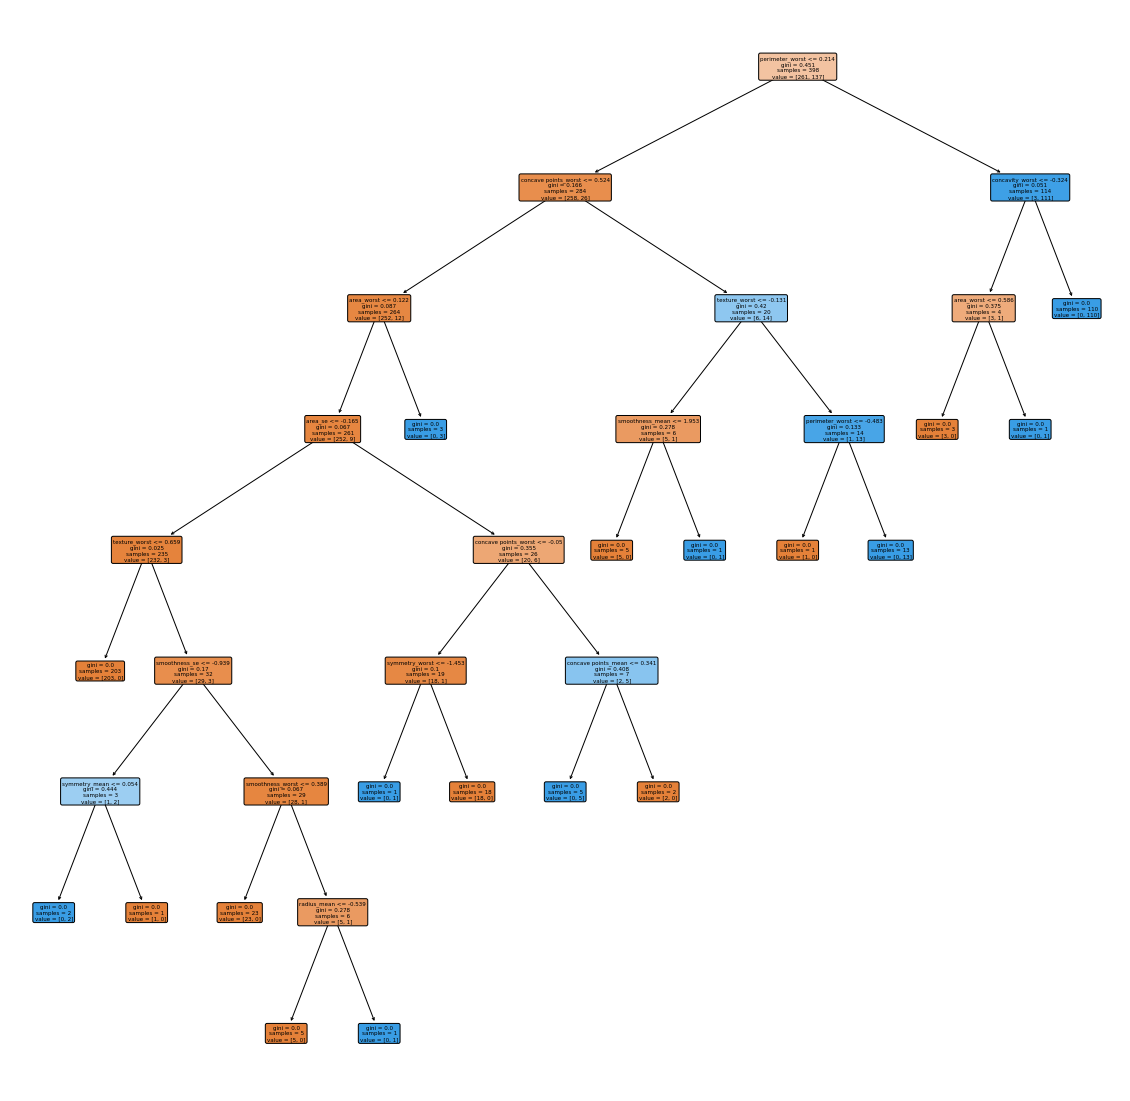

In [29]:
#plotting 
plt.figure(figsize=(20,20))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)
plt.savefig('tree.png',dpi=1200)

In [30]:
pred=clf.predict(xtest)

In [31]:
pred      #predicted result

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [35]:
np.array(ytest)   #actual result

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [36]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve  #for measuring accuracy,confusion matrix,roc_curve

In [37]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.97      0.95        96\n           1       0.96      0.91      0.93        75\n\n    accuracy                           0.94       171\n   macro avg       0.94      0.94      0.94       171\nweighted avg       0.94      0.94      0.94       171\n'

# classification_report

In [38]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        96
           1       0.96      0.91      0.93        75

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# Confusion Matrix

In [39]:
cm=confusion_matrix(ytest,pred)

In [40]:
cm

array([[93,  3],
       [ 7, 68]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

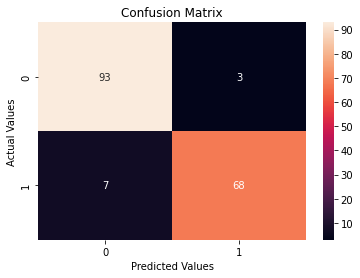

In [41]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [42]:
tp,fn,fp,tn=confusion_matrix(ytest,pred).reshape(-1)

In [43]:
tp

93

In [44]:
fn

3

In [45]:
fp

7

In [46]:
tn

68

# Accuracy

In [47]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)

In [48]:
Accuracy

0.9415204678362573

# ROC and AUC Curve

In [50]:
from sklearn.metrics import plot_roc_curve

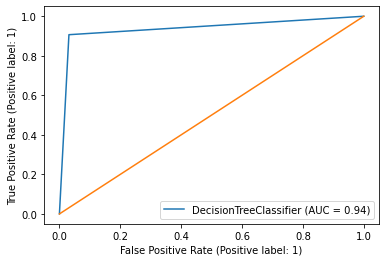

In [51]:
plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])

# KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
 neigh = KNeighborsClassifier(n_neighbors=3)   #creating an object

In [55]:
neigh.fit(xtrain,ytrain)                       #training 

KNeighborsClassifier(n_neighbors=3)

In [56]:
pred1=neigh.predict(xtest)

In [57]:
pred1

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [62]:
classification_report(ytest,pred1)

'              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97        96\n           1       0.99      0.93      0.96        75\n\n    accuracy                           0.96       171\n   macro avg       0.97      0.96      0.96       171\nweighted avg       0.97      0.96      0.96       171\n'

# classification_report

In [64]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        96
           1       0.99      0.93      0.96        75

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



# Confusion matrix

In [65]:
cm1=confusion_matrix(ytest,pred1)

In [66]:
cm1

array([[95,  1],
       [ 5, 70]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

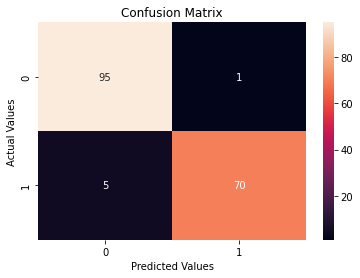

In [67]:
sns.heatmap(cm1,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [68]:
tp,fn,fp,tn=confusion_matrix(ytest,pred1).reshape(-1)

In [69]:
tp

95

In [70]:
fn

1

In [71]:
fp

5

In [72]:
tn

70

# Accuracy

In [73]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)

In [74]:
Accuracy

0.9649122807017544

# ROC and AUC Curve

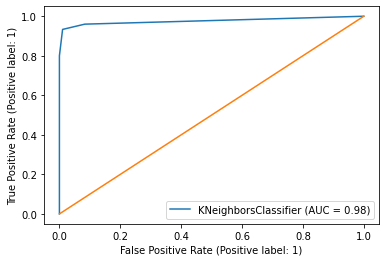

In [75]:
plot_roc_curve(neigh,xtest,ytest)
plt.plot([0,1],[0,1])

# Summary

In [ ]:
For Decision tree classifier Accuracy=94% and for K nearest neighbour classifier Accuracy=96%.So we can conclude that KNN classi
fier is show better performance than Decision tree classifier.

In [ ]:
For Decision tree classifier AUC(Area Under Curve)=0.94 and for KNN classifier AUC=0.98.The higher the AUC , the better the performance of the model
at distinguishing between the positive and negative classes.So in this case, KNN classifier is showing better performance than Decision tree classifier.
